# Chapter 4: Getting Started with neural networks: classification and regression

## Part 1

In [110]:
def listing4_1():
    from tensorflow import keras
    from tensorflow.keras.datasets import imdb
    
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
        # keep only to 10K words, discard rare words
        num_words = 10_000
    )
    print(train_data.shape, train_labels.shape)
    print(f'train_data[0]: {train_data[0][:10]}')
    print(f'test_labels[0]: {test_labels[0]}')
    print(max([max(sequence) for sequence in train_data]))
    

#listing4_1()

In [111]:
def listing4_1_2():
    from tensorflow import keras
    from tensorflow.keras.datasets import imdb
    import numpy as np
    from tensorflow.keras import layers
    import matplotlib.pyplot as plt
    
    # load dataset
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
        num_words = 10_000
    )
    print(train_data.shape, train_labels.shape)
    print(f'train_data[0]: {train_data[0][:10]}')
    print(f'test_labels[0]: {test_labels[0]}')
    print()
    
    # prepare data
    def vectorize_sequences(sequences, dimension=10_000):
        # create all-zero matrix
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                # set indices of results[i,j] to 1s
                results[i, j] = 1.
        return results
    
    # vectorize training and test data
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
    
    print(x_train.shape, x_test.shape)
    print(x_train[0][:10])
    print(x_test[0][:10])
    
    # vectorize labels
    y_train = np.asarray(train_labels).astype("float32")
    y_test = np.asarray(test_labels).astype("float32")
    
    
    # model definition
    model = keras.Sequential([
        # W/o relu, Dense only has 2 linear operations, dot product and addition
        # meaning it could only learn linear transformations of the input data.
        # Since we want to handle non-linearities in data, we use the relu function.
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    # Use crossentropy for models with probabilities
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    # validate our approach
    # use validation data to monitor accuracy of model training
    x_val = x_train[:10_000]
    partial_x_train = x_train[10_000:]
    y_val = y_train[:10_000]
    partial_y_train = y_train[10_000:]
    print(x_val.shape, partial_x_train.shape)
    
    # train the model in batch-sizes of 512 at a time.
    # by diving 10_000 into 512 batch-size, we iterate
    # 19.5 times per epoch. generally using batch_sizes
    # reduces required memory, since not everything is
    # pulled in at once. 
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data = (x_val, y_val),
        verbose=2,
    )
    
    print()
    
    results = model.evaluate(x_test, y_test)
    print(f'results: {results}')
    
    print(history.history.keys())

    
    # plotting training and validation loss
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, loss_values, "bo", label="Training Loss")
    ax1.plot(epochs, val_loss_values, "b", label="Validation Loss")
    ax1.set_title("Training and Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # plotting training and validation accuracy
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(epochs, acc, "bo", label="Training Accuracy")
    ax2.plot(epochs, val_acc, "b", label="Validation Accuracy")
    ax2.set_title("Training and Validation Accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    
    plt.show()
    
#listing4_1_2()

(25000,) (25000,)
train_data[0]: [1, 14, 22, 16, 43, 530, 973, 2, 2, 65]
test_labels[0]: 0

(25000, 10000) (25000, 10000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
(10000, 10000) (15000, 10000)

782/782 [==============================] - 2s 2ms/step - loss: 0.3399 - accuracy: 0.8579

results: [0.33993393182754517, 0.8578799962997437]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


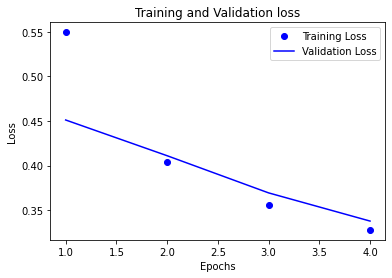

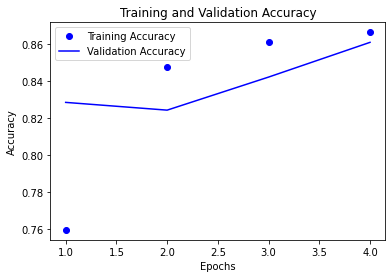


predictions: [[0.42356136]
 [0.97773796]
 [0.6069062 ]
 ...
 [0.14201212]
 [0.15338579]
 [0.37044448]]


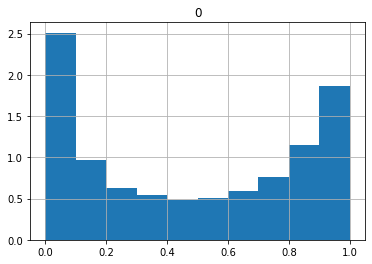

In [5]:
def listing4_10():
    from tensorflow import keras
    from tensorflow.keras.datasets import imdb
    import numpy as np
    from tensorflow.keras import layers
    import matplotlib.pyplot as plt
    
    # load dataset
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
        #num_words = 10_000
        num_words = 1_000
    )
    print(train_data.shape, train_labels.shape)
    print(f'train_data[0]: {train_data[0][:10]}')
    print(f'test_labels[0]: {test_labels[0]}')
    print()
    
    # prepare data
    def vectorize_sequences(sequences, dimension=10_000):
        # create all-zero matrix
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                # set indices of results[i,j] to 1s
                results[i, j] = 1.
        return results
    
    # vectorize training and test data
    x_train = vectorize_sequences(train_data)
    x_test = vectorize_sequences(test_data)
    
    print(x_train.shape, x_test.shape)
    print(x_train[0][:10])
    print(x_test[0][:10])
    
    # vectorize labels
    y_train = np.asarray(train_labels).astype("float32")
    y_test = np.asarray(test_labels).astype("float32")
    
    
    # model definition
    model = keras.Sequential([
        # W/o relu, Dense only has 2 linear operations, dot product and addition
        # meaning it could only learn linear transformations of the input data.
        # Since we want to handle non-linearities in data, we use the relu function.
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    
    # Use crossentropy for models with probabilities
    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    # validate our approach
    # use validation data to monitor accuracy of model training
    x_val = x_train[:10_000]
    partial_x_train = x_train[10_000:]
    y_val = y_train[:10_000]
    partial_y_train = y_train[10_000:]
    print(x_val.shape, partial_x_train.shape)
    
    # train the model in batch-sizes of 512 at a time.
    # by diving 10_000 into 512 batch-size, we iterate
    # 19.5 times per epoch. generally using batch_sizes
    # reduces required memory, since not everything is
    # pulled in at once. 
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=4, # reduced from 20 epochs
        batch_size=512,
        validation_data = (x_val, y_val),
        verbose=0,
    )
    
    print()
    
    results = model.evaluate(x_test, y_test)
    print()
    print(f'results: {results}')
    print()
    
    print(history.history.keys())

    
    # plotting training and validation loss
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    fig1 = plt.figure()
    ax1 = fig1.add_subplot()
    ax1.plot(epochs, loss_values, "bo", label="Training Loss")
    ax1.plot(epochs, val_loss_values, "b", label="Validation Loss")
    ax1.set_title("Training and Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    # plotting training and validation accuracy
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(epochs, acc, "bo", label="Training Accuracy")
    ax2.plot(epochs, val_acc, "b", label="Validation Accuracy")
    ax2.set_title("Training and Validation Accuracy")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    
    plt.show()
    
    print()
    
    # use trained model to generate predictions on new data
    predictions = model.predict(x_test)
    print(f'predictions: {predictions}')
    
    import pandas as pd
    
    df = pd.DataFrame(predictions)
    df.hist(grid=True, density=True)
    
listing4_10()

In [10]:
# def listing4_10_experiment():
#     from tensorflow import keras
#     from tensorflow.keras.datasets import imdb
#     import numpy as np
#     from tensorflow.keras import layers
#     import matplotlib.pyplot as plt
    
#     # load dataset
#     (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
#         #num_words = 10_000
#         num_words = 1_000
#     )
# #     print(train_data.shape, train_labels.shape)
# #     print(f'train_data[0]: {train_data[0][:10]}')
# #     print(f'test_labels[0]: {test_labels[0]}')
# #     print()
    
#     # prepare data
#     def vectorize_sequences(sequences, dimension=10_000):
#         # create all-zero matrix
#         results = np.zeros((len(sequences), dimension))
#         for i, sequence in enumerate(sequences):
#             for j in sequence:
#                 # set indices of results[i,j] to 1s
#                 results[i, j] = 1.
#         return results
    
#     # vectorize training and test data
#     x_train = vectorize_sequences(train_data)
#     x_test = vectorize_sequences(test_data)
    
# #     print(x_train.shape, x_test.shape)
# #     print(x_train[0][:10])
# #     print(x_test[0][:10])
    
#     # vectorize labels
#     y_train = np.asarray(train_labels).astype("float32")
#     y_test = np.asarray(test_labels).astype("float32")
    
    
#     # model definition
#     model = keras.Sequential([
#         # W/o relu, Dense only has 2 linear operations, dot product and addition
#         # meaning it could only learn linear transformations of the input data.
#         # Since we want to handle non-linearities in data, we use the relu function.
#         layers.Dense(16, activation="relu"),
#         layers.Dense(16, activation="relu"),
#         layers.Dense(2, activation="softmax")
#     ])
    
#     # Use crossentropy for models with probabilities
#     model.compile(
#         optimizer="rmsprop",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )
    
#     # validate our approach
#     # use validation data to monitor accuracy of model training
#     x_val = x_train[:10_000]
#     partial_x_train = x_train[10_000:]
#     y_val = y_train[:10_000]
#     partial_y_train = y_train[10_000:]
#     #print(x_val.shape, partial_x_train.shape)
    
#     # train the model in batch-sizes of 512 at a time.
#     # by diving 10_000 into 512 batch-size, we iterate
#     # 19.5 times per epoch. generally using batch_sizes
#     # reduces required memory, since not everything is
#     # pulled in at once. 
#     history = model.fit(
#         partial_x_train,
#         partial_y_train,
#         epochs=4, # reduced from 20 epochs
#         batch_size=512,
#         validation_data = (x_val, y_val),
#         verbose=1,
#     )
    
#     print()
    
#     results = model.evaluate(x_test, y_test)
#     print()
#     print(f'results: {results}')
#     print()
    
#     print(history.history.keys())

    
#     # plotting training and validation loss
#     history_dict = history.history
#     loss_values = history_dict["loss"]
#     val_loss_values = history_dict["val_loss"]
#     epochs = range(1, len(loss_values) + 1)
#     fig1 = plt.figure()
#     ax1 = fig1.add_subplot()
#     ax1.plot(epochs, loss_values, "bo", label="Training Loss")
#     ax1.plot(epochs, val_loss_values, "b", label="Validation Loss")
#     ax1.set_title("Training and Validation loss")
#     ax1.set_xlabel("Epochs")
#     ax1.set_ylabel("Loss")
#     ax1.legend()
    
#     # plotting training and validation accuracy
#     acc = history_dict["accuracy"]
#     val_acc = history_dict["val_accuracy"]
#     fig2 = plt.figure()
#     ax2 = fig2.add_subplot()
#     ax2.plot(epochs, acc, "bo", label="Training Accuracy")
#     ax2.plot(epochs, val_acc, "b", label="Validation Accuracy")
#     ax2.set_title("Training and Validation Accuracy")
#     ax2.set_xlabel("Epochs")
#     ax2.set_ylabel("Accuracy")
#     ax2.legend()
    
#     plt.show()
    
#     print()
    
#     # use trained model to generate predictions on new data
#     predictions = model.predict(x_test)
#     print(f'predictions: {predictions}')
    
#     import pandas as pd
    
#     df = pd.DataFrame(predictions)
#     df.hist(grid=True, density=True)
    
# listing4_10_experiment()